In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from keras.datasets import cifar10
(x_train_rgb,y_train),(x_test_rgb,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
fashion_mnist_labels=["airplane",
                      "automobile",
                      "bird",
                      "cat",
                      "deer",
                      "dog",
                      "frog",
                      "horse",
                      "ship",
                      "truck"]

In [ ]:
x_train_rgb.shape

(50000, 32, 32, 3)

In [ ]:
print(y_train[2])
y_train.shape

[9]


(50000, 1)

In [6]:

def rgb_to_gray(img):
  R, G, B = img[:,:,:,0], img[:,:,:,1], img[:,:,:,2]
  imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
  return imgGray
#plt.imshow(imgGray, cmap='gray')
#plt.show()


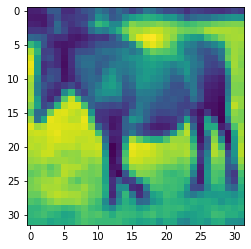

In [7]:

x_train_gray =rgb_to_gray(x_train_rgb)
x_test_gray = rgb_to_gray(x_test_rgb)

plt.imshow(x_train_gray[7])
x_train_gray.shape
x_test_gray = x_test_gray/255
x_train_gray = x_train_gray/255

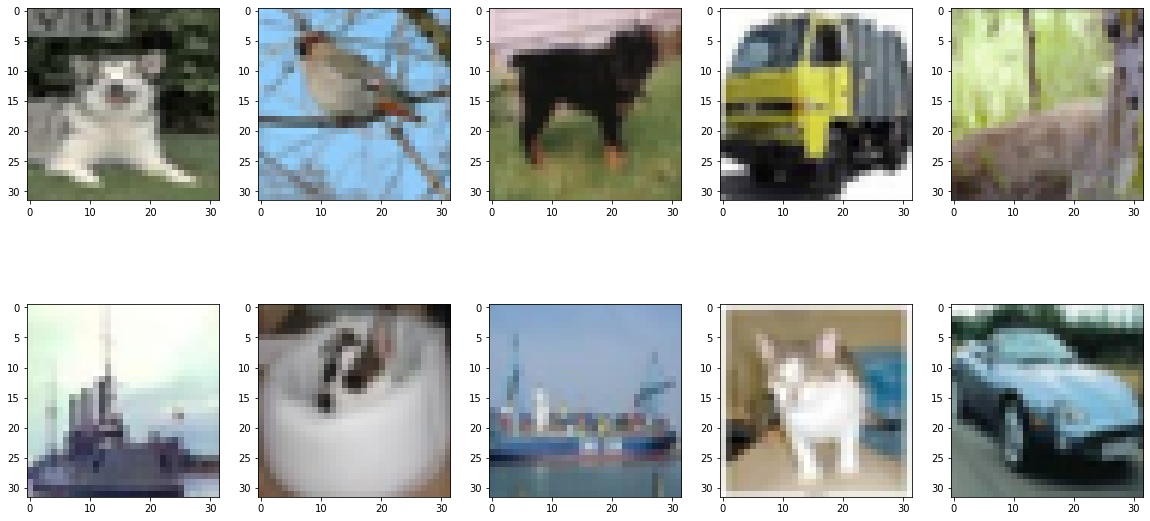

In [ ]:
figure = plt.figure(figsize=(20, 10))
for i in range(10):
  photo= np.random.choice(x_train_rgb.shape[0], size=15, replace=False)
  ax = figure.add_subplot(2, 5, i+1)
  ax.imshow(np.squeeze(x_train_rgb[photo[i]]))

(50000, 32, 32)
[0.9999     0.99205765 0.99205765 ... 0.32420078 0.32537294 0.32929412]
(50000, 1024)


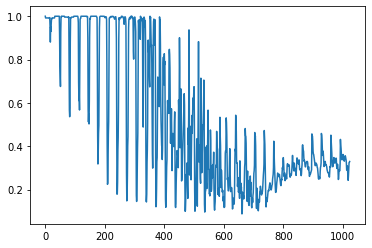

In [8]:
#x_train=x_train/255
print(x_train_gray.shape)
x_train = x_train_gray.reshape(x_train_gray.shape[0],32*32)
x_test = x_test_gray.reshape(x_test_gray.shape[0],32*32)
print(x_train[2])
print(x_train.shape)
plt.plot(x_train[2])

In [9]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#soal_te

##model1


In [69]:

#from tensorflow.keras import Sequential , layers , losses
from tensorflow.keras import Sequential, layers, losses
model1 = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='softmax')                    
])
model1.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                32800     
                                                                 
 dense_19 (Dense)            (None, 32)                1056      
                                                                 
 dense_20 (Dense)            (None, 10)                330       
                                                                 
Total params: 34,186
Trainable params: 34,186
Non-trainable params: 0
_________________________________________________________________


In [70]:
#@title
import datetime as dt
t0_relu = dt.datetime.now()
train_model1 = model1.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_relu = dt.datetime.now()
print(t1_relu-t0_relu)

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 0.3412 - accuracy: 0.1631 - val_loss: 0.3173 - val_accuracy: 0.2079
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3092 - accuracy: 0.2320 - val_loss: 0.3036 - val_accuracy: 0.2541
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2996 - accuracy: 0.2697 - val_loss: 0.2983 - val_accuracy: 0.2781
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2950 - accuracy: 0.2846 - val_loss: 0.2948 - val_accuracy: 0.2832
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2915 - accuracy: 0.2943 - val_loss: 0.2914 - val_accuracy: 0.2972
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2880 - accuracy: 0.3018 - val_loss: 0.2877 - val_accuracy: 0.3042
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2854 - accuracy: 0.3067 - val_loss: 0.2859 - val_accuracy: 0.3041

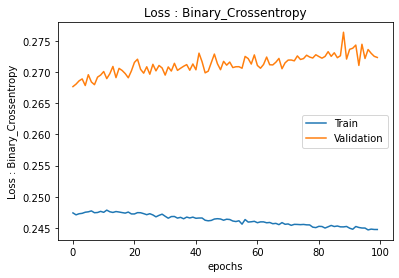

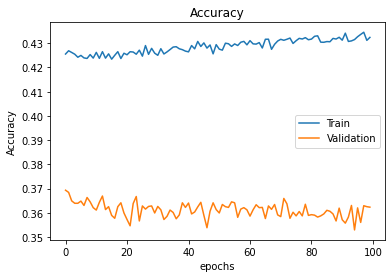

In [68]:
plt.plot(train_model1.history['loss'])
plt.plot(train_model1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1.history['accuracy'])
plt.plot(train_model1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [31]:
test_loss,test_accuracy = model1.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2760 - accuracy: 0.3573
0.2759501338005066
0.3573000133037567


[0.42312579 0.39607201 0.29617486 0.27393617 0.27948718 0.37422553
 0.28847481 0.39004149 0.46100691 0.42236699]
[0.333 0.484 0.271 0.206 0.327 0.302 0.418 0.376 0.467 0.389]
[0.37269166 0.43564356 0.28302872 0.23515982 0.30138249 0.33425567
 0.34136382 0.38289206 0.4639841  0.4049974 ]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


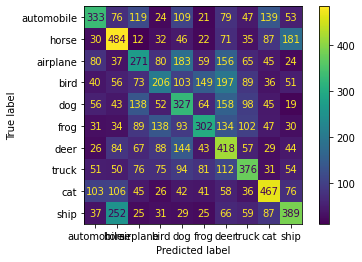

In [32]:
y_pred1 = model1.predict(x_test)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
y1=[]
p1=[]

for k in range(len(y_test)):
  y1 +=[np.argmax(y_test[k])]
  p1 +=[np.argmax(y_pred1[k])]
#print(y1)
#print(p1)
met = precision_recall_fscore_support(y1, p1)
for m in range(4):
  print(met[m])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y1, p1),
                              display_labels={"airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"} )
disp.plot() 
#confusion_matrix(y1,p1)

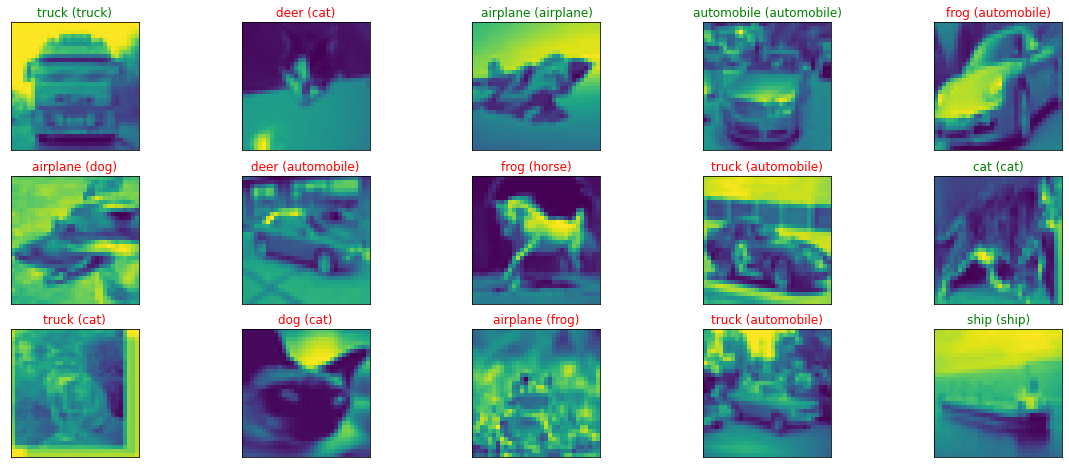

In [ ]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test_rgb.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test_gray[index]))
    predict_index = np.argmax(y_pred[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

##model2

In [ ]:
model2 = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='relu'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='softmax')                    
])
model2.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                32800     
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
Total params: 33,240
Trainable params: 33,240
Non-trainable params: 0
_________________________________________________________________


In [ ]:
t0 = dt.datetime.now()
train_model2 = model2.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1 = dt.datetime.now()
print(t1-t0)

Epoch 1/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2610 - accuracy: 0.3803 - val_loss: 0.2721 - val_accuracy: 0.3506
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2609 - accuracy: 0.3820 - val_loss: 0.2724 - val_accuracy: 0.3477
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2607 - accuracy: 0.3822 - val_loss: 0.2721 - val_accuracy: 0.3451
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2608 - accuracy: 0.3810 - val_loss: 0.2728 - val_accuracy: 0.3439
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2609 - accuracy: 0.3812 - val_loss: 0.2727 - val_accuracy: 0.3478
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2606 - accuracy: 0.3842 - val_loss: 0.2719 - val_accuracy: 0.3499
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2609 - accuracy: 0.3830 - val_loss: 0.2717 - val_accuracy: 0.3493

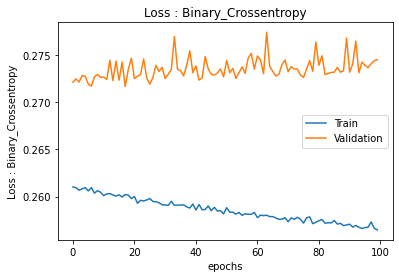

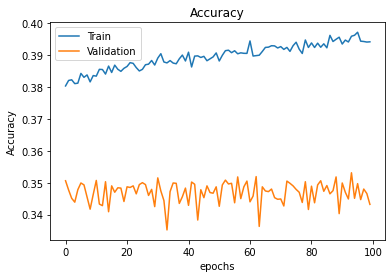

In [ ]:
plt.plot(train_model2.history['loss'])
plt.plot(train_model2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model2.history['accuracy'])
plt.plot(train_model2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
test_loss,test_accuracy = model2.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)

313/313 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.3422
0.27584829926490784
0.34220001101493835


[0.41275168 0.39226033 0.27754678 0.25       0.2512987  0.3580786
 0.32324219 0.34016973 0.4073107  0.42448513]
[0.246 0.446 0.267 0.097 0.387 0.328 0.331 0.481 0.468 0.371]
[0.30827068 0.41740758 0.27217125 0.13976945 0.30472441 0.34237996
 0.3270751  0.3985087  0.43555142 0.3959445 ]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


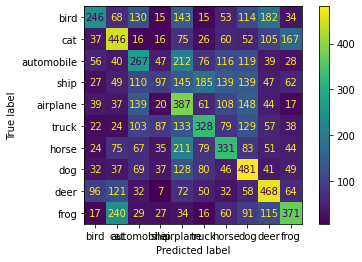

In [ ]:
y_pred2 = model2.predict(x_test)
#from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import precision_recall_fscore_support
y2=[]
p2=[]

for k in range(len(y_test)):
  y2 +=[np.argmax(y_test[k])]
  p2 +=[np.argmax(y_pred2[k])]
#print(y1)
#print(p1)
met2 = precision_recall_fscore_support(y2, p2)
for m in range(4):
  print(met2[m])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y2, p2),
                              display_labels={"airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"} )
disp.plot() 

##modle3

In [33]:
model3 = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32*32,activation='relu'),
    layers.Dense(32,activation='relu'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='softmax')                    
])
model3.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                32800     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 34,186
Trainable params: 34,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
t0 = dt.datetime.now()
train_model3 = model3.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1 = dt.datetime.now()
print(t1-t0)

In [ ]:
plt.plot(train_model3.history['loss'])
plt.plot(train_model3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model3.history['accuracy'])
plt.plot(train_model3.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


In [ ]:
test_loss,test_accuracy = model3.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)


In [ ]:
y_pred3 = model3.predict(x_test)
y3=[]
p3=[]

for k in range(len(y_test)):
  y3 +=[np.argmax(y_test[k])]
  p3 +=[np.argmax(y_pred3[k])]
#print(y1)
#print(p1)
met3 = precision_recall_fscore_support(y3, p3)
for m in range(4):
  print(met3[m])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y3, p3),
                              display_labels={"airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"} )
disp.plot() 

#soal_de

##32

In [60]:
import datetime as dt
t0 = dt.datetime.now()
train_model1_2 = model1.fit(x_train,y_train,epochs=50, validation_split=0.2,batch_size=32)
t1 = dt.datetime.now()
print(t1-t0)

Epoch 1/50
1250/1250 [==============================] - 5s 3ms/step - loss: 0.2566 - accuracy: 0.3977 - val_loss: 0.2716 - val_accuracy: 0.3516
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2556 - accuracy: 0.3993 - val_loss: 0.2701 - val_accuracy: 0.3537
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2553 - accuracy: 0.4040 - val_loss: 0.2722 - val_accuracy: 0.3532
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2557 - accuracy: 0.3996 - val_loss: 0.2682 - val_accuracy: 0.3561
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2550 - accuracy: 0.4010 - val_loss: 0.2693 - val_accuracy: 0.3597
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2550 - accuracy: 0.4011 - val_loss: 0.2695 - val_accuracy: 0.3563
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2550 - accuracy: 0.4003 - val_loss: 0.2695 - val_accuracy:

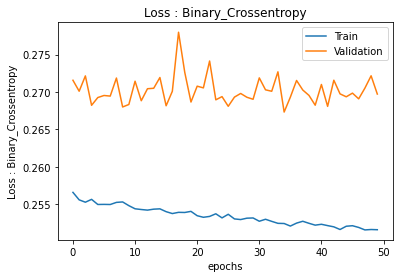

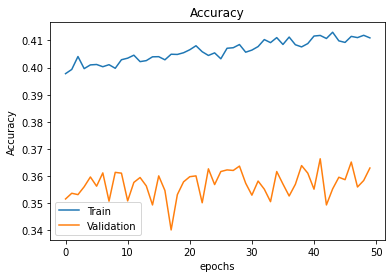

313/313 [==============================] - 0s 1ms/step - loss: 0.2702 - accuracy: 0.3594
0.2702089548110962
0.3594000041484833


In [61]:
plt.plot(train_model1_2.history['loss'])
plt.plot(train_model1_2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_2.history['accuracy'])
plt.plot(train_model1_2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

test_loss,test_accuracy = model1.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)

##64

In [58]:
import datetime as dt
t0 = dt.datetime.now()
train_model1_3 = model1.fit(x_train,y_train,epochs=50, validation_split=0.2,batch_size=64)
t1 = dt.datetime.now()
print(t1-t0)

Epoch 1/50
625/625 [==============================] - 3s 4ms/step - loss: 0.2620 - accuracy: 0.3816 - val_loss: 0.2711 - val_accuracy: 0.3452
Epoch 2/50
625/625 [==============================] - 2s 3ms/step - loss: 0.2596 - accuracy: 0.3853 - val_loss: 0.2677 - val_accuracy: 0.3624
Epoch 3/50
625/625 [==============================] - 2s 3ms/step - loss: 0.2587 - accuracy: 0.3893 - val_loss: 0.2692 - val_accuracy: 0.3585
Epoch 4/50
625/625 [==============================] - 2s 3ms/step - loss: 0.2583 - accuracy: 0.3910 - val_loss: 0.2703 - val_accuracy: 0.3548
Epoch 5/50
625/625 [==============================] - 2s 3ms/step - loss: 0.2580 - accuracy: 0.3923 - val_loss: 0.2670 - val_accuracy: 0.3643
Epoch 6/50
625/625 [==============================] - 2s 3ms/step - loss: 0.2577 - accuracy: 0.3932 - val_loss: 0.2679 - val_accuracy: 0.3588
Epoch 7/50
625/625 [==============================] - 2s 3ms/step - loss: 0.2580 - accuracy: 0.3938 - val_loss: 0.2672 - val_accuracy: 0.3632
Epoch 

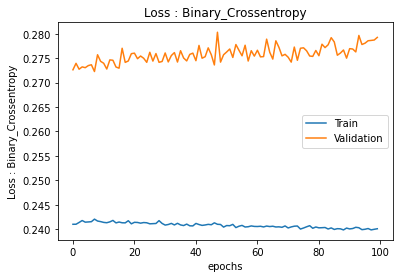

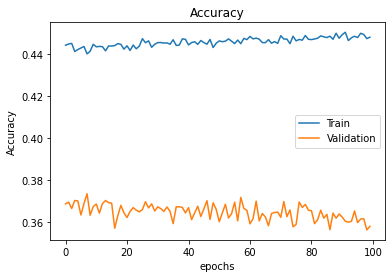

313/313 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.3599
0.2691643238067627
0.35989999771118164


In [59]:
plt.plot(train_model3.history['loss'])
plt.plot(train_model3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model3.history['accuracy'])
plt.plot(train_model3.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

test_loss,test_accuracy = model1.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)

##512

In [56]:
import datetime as dt
t0 = dt.datetime.now()
train_model1_4 = model1.fit(x_train,y_train,epochs=50, validation_split=0.2,batch_size=512)
t1 = dt.datetime.now()
print(t1-t0)

Epoch 1/50
79/79 [==============================] - 1s 10ms/step - loss: 0.2591 - accuracy: 0.3895 - val_loss: 0.2674 - val_accuracy: 0.3623
Epoch 2/50
79/79 [==============================] - 1s 9ms/step - loss: 0.2587 - accuracy: 0.3906 - val_loss: 0.2677 - val_accuracy: 0.3627
Epoch 3/50
79/79 [==============================] - 1s 9ms/step - loss: 0.2587 - accuracy: 0.3914 - val_loss: 0.2675 - val_accuracy: 0.3618
Epoch 4/50
79/79 [==============================] - 1s 9ms/step - loss: 0.2586 - accuracy: 0.3920 - val_loss: 0.2677 - val_accuracy: 0.3649
Epoch 5/50
79/79 [==============================] - 1s 10ms/step - loss: 0.2587 - accuracy: 0.3908 - val_loss: 0.2678 - val_accuracy: 0.3582
Epoch 6/50
79/79 [==============================] - 1s 9ms/step - loss: 0.2585 - accuracy: 0.3917 - val_loss: 0.2680 - val_accuracy: 0.3614
Epoch 7/50
79/79 [==============================] - 1s 8ms/step - loss: 0.2586 - accuracy: 0.3897 - val_loss: 0.2679 - val_accuracy: 0.3600
Epoch 8/50
79/79 [

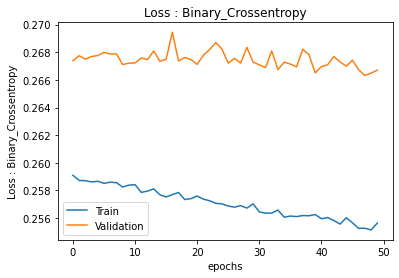

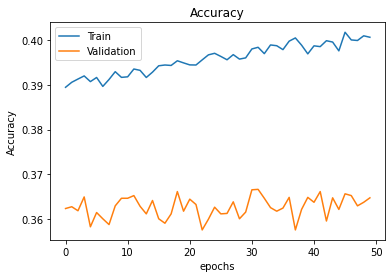

313/313 [==============================] - 1s 2ms/step - loss: 0.2666 - accuracy: 0.3707
0.2666318714618683
0.37070000171661377


In [57]:
plt.plot(train_model1_4.history['loss'])
plt.plot(train_model1_4.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_4.history['accuracy'])
plt.plot(train_model1_4.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

test_loss,test_accuracy = model1.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)

##128

In [54]:
t0 = dt.datetime.now()
train_model1 = model1.fit(x_train,y_train,epochs=50, validation_split=0.2,batch_size=128)
t1 = dt.datetime.now()
print(t1-t0)

Epoch 1/50
313/313 [==============================] - 3s 7ms/step - loss: 0.3468 - accuracy: 0.1655 - val_loss: 0.3163 - val_accuracy: 0.2123
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 0.3107 - accuracy: 0.2281 - val_loss: 0.3066 - val_accuracy: 0.2323
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 0.3042 - accuracy: 0.2472 - val_loss: 0.3018 - val_accuracy: 0.2546
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 0.2975 - accuracy: 0.2665 - val_loss: 0.2960 - val_accuracy: 0.2788
Epoch 5/50
313/313 [==============================] - 3s 8ms/step - loss: 0.2932 - accuracy: 0.2810 - val_loss: 0.2926 - val_accuracy: 0.2803
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 0.2892 - accuracy: 0.2957 - val_loss: 0.2880 - val_accuracy: 0.3017
Epoch 7/50
313/313 [==============================] - 2s 8ms/step - loss: 0.2862 - accuracy: 0.3042 - val_loss: 0.2865 - val_accuracy: 0.3018
Epoch 

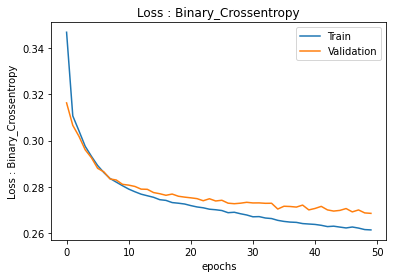

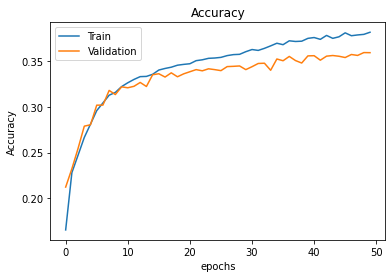

313/313 [==============================] - 1s 2ms/step - loss: 0.2682 - accuracy: 0.3631
0.2681870460510254
0.36309999227523804


In [55]:
plt.plot(train_model1.history['loss'])
plt.plot(train_model1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1.history['accuracy'])
plt.plot(train_model1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

test_loss,test_accuracy = model1.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)

#soal_he

## Relu

In [82]:
model1_relu = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='relu')                    
])
model1_relu.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_relu.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 32)                32800     
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dense_35 (Dense)            (None, 10)                330       
                                                                 
Total params: 34,186
Trainable params: 34,186
Non-trainable params: 0
_________________________________________________________________


In [83]:
t0_relu = dt.datetime.now()
train_model1_relu = model1_relu.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_relu = dt.datetime.now()
print(t1_relu-t0_relu)

Epoch 1/100
313/313 [==============================] - 2s 4ms/step - loss: 0.9096 - accuracy: 0.1240 - val_loss: 0.9427 - val_accuracy: 0.1155
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 0.9331 - accuracy: 0.1334 - val_loss: 0.9336 - val_accuracy: 0.1510
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.9280 - accuracy: 0.1545 - val_loss: 0.9309 - val_accuracy: 0.1736
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 0.9780 - accuracy: 0.1606 - val_loss: 0.8350 - val_accuracy: 0.1022
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 0.7366 - accuracy: 0.1387 - val_loss: 0.6844 - val_accuracy: 0.1673
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.6856 - accuracy: 0.1620 - val_loss: 0.6830 - val_accuracy: 0.1659
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 0.8617 - accuracy: 0.1256 - val_loss: 0.8054 - val_accuracy: 0.1142

0:01:58.506568
313/313 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.3517
0.2720027267932892
0.3517000079154968


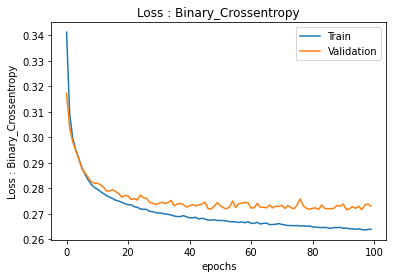

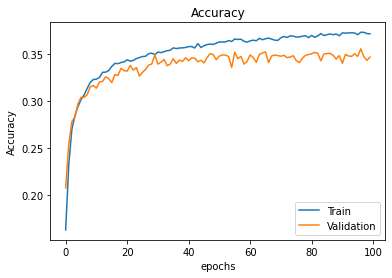

In [84]:
print(t1_relu-t0_relu)
test_loss,test_accuracy = model1.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1.history['loss'])
plt.plot(train_model1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1.history['accuracy'])
plt.plot(train_model1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##TanH

In [85]:
model1_tanh = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='tanh'),
    layers.Dense(32,activation='tanh'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='tanh')                    
])
model1_tanh.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_tanh.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                32800     
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 10)                330       
                                                                 
Total params: 34,186
Trainable params: 34,186
Non-trainable params: 0
_________________________________________________________________


In [86]:
t0_tanh = dt.datetime.now()
train_model1_tanh = model1_tanh.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_tanh = dt.datetime.now()
print(t1_tanh-t0_tanh)

Epoch 1/100
313/313 [==============================] - 2s 4ms/step - loss: 1.0775 - accuracy: 0.1223 - val_loss: 1.0522 - val_accuracy: 0.1344
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 1.0645 - accuracy: 0.1103 - val_loss: 1.0548 - val_accuracy: 0.0991
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 1.0568 - accuracy: 0.1151 - val_loss: 1.0583 - val_accuracy: 0.1179
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 1.0545 - accuracy: 0.1395 - val_loss: 1.0516 - val_accuracy: 0.1430
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 1.0559 - accuracy: 0.1362 - val_loss: 1.0503 - val_accuracy: 0.1456
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 1.0564 - accuracy: 0.1456 - val_loss: 1.0591 - val_accuracy: 0.1137
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 1.0689 - accuracy: 0.1304 - val_loss: 1.0539 - val_accuracy: 0.1130

0:02:00.884898
313/313 [==============================] - 0s 1ms/step - loss: 0.9622 - accuracy: 0.0996
0.9621915817260742
0.09960000216960907


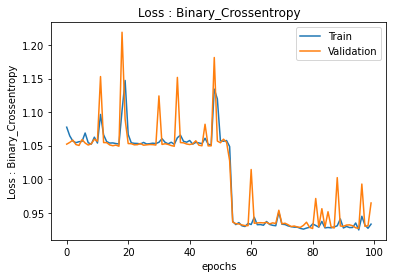

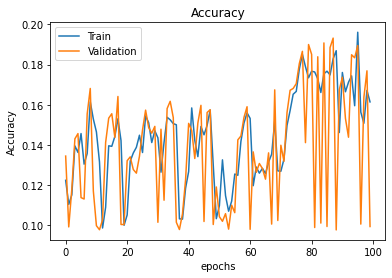

In [87]:
print(t1_tanh-t0_tanh)
test_loss,test_accuracy = model1_tanh.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1_tanh.history['loss'])
plt.plot(train_model1_tanh.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_tanh.history['accuracy'])
plt.plot(train_model1_tanh.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##sigmoid

In [88]:
model1_sigmoid = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='sigmoid')                    
])
model1_sigmoid.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_sigmoid.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 32)                32800     
                                                                 
 dense_40 (Dense)            (None, 32)                1056      
                                                                 
 dense_41 (Dense)            (None, 10)                330       
                                                                 
Total params: 34,186
Trainable params: 34,186
Non-trainable params: 0
_________________________________________________________________


In [89]:
t0_sigmoid = dt.datetime.now()
train_model1_sigmoid = model1_sigmoid.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_sigmoid = dt.datetime.now()
print(t1_sigmoid-t0_sigmoid)

Epoch 1/100
313/313 [==============================] - 2s 4ms/step - loss: 0.3724 - accuracy: 0.0997 - val_loss: 0.3250 - val_accuracy: 0.1014
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3246 - accuracy: 0.1174 - val_loss: 0.3236 - val_accuracy: 0.1500
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3206 - accuracy: 0.1717 - val_loss: 0.3149 - val_accuracy: 0.1998
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3090 - accuracy: 0.2063 - val_loss: 0.3048 - val_accuracy: 0.2224
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3026 - accuracy: 0.2373 - val_loss: 0.3011 - val_accuracy: 0.2376
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2986 - accuracy: 0.2624 - val_loss: 0.2972 - val_accuracy: 0.2687
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2957 - accuracy: 0.2734 - val_loss: 0.2948 - val_accuracy: 0.2755

0:02:22.538078
313/313 [==============================] - 0s 1ms/step - loss: 0.2611 - accuracy: 0.3845
0.2611045837402344
0.38449999690055847


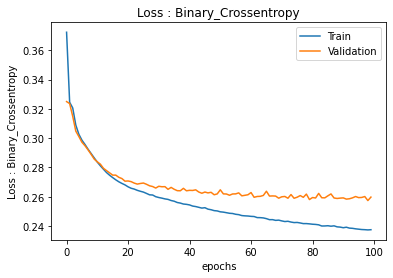

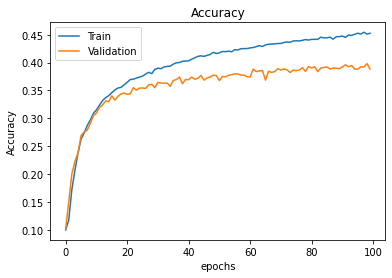

In [90]:
print(t1_sigmoid-t0_sigmoid)
test_loss,test_accuracy = model1_sigmoid.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1_sigmoid.history['loss'])
plt.plot(train_model1_sigmoid.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_sigmoid.history['accuracy'])
plt.plot(train_model1_sigmoid.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##softmax

In [76]:
model1_softmax = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='softmax'),
    layers.Dense(32,activation='softmax'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='softmax')                    
])
model1_softmax.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_softmax.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                32800     
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 10)                330       
                                                                 
Total params: 34,186
Trainable params: 34,186
Non-trainable params: 0
_________________________________________________________________


In [93]:
t0_softmax = dt.datetime.now()
train_model1_softmax = model1_softmax.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_softmax = dt.datetime.now()
print(t1_softmax-t0_softmax)

Epoch 1/100
313/313 [==============================] - 2s 6ms/step - loss: 0.2393 - accuracy: 0.4411 - val_loss: 0.2789 - val_accuracy: 0.3400
Epoch 2/100
313/313 [==============================] - 2s 5ms/step - loss: 0.2392 - accuracy: 0.4415 - val_loss: 0.2796 - val_accuracy: 0.3422
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2397 - accuracy: 0.4403 - val_loss: 0.2800 - val_accuracy: 0.3435
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2393 - accuracy: 0.4395 - val_loss: 0.2787 - val_accuracy: 0.3360
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2391 - accuracy: 0.4430 - val_loss: 0.2806 - val_accuracy: 0.3377
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2389 - accuracy: 0.4418 - val_loss: 0.2799 - val_accuracy: 0.3355
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 0.2393 - accuracy: 0.4414 - val_loss: 0.2800 - val_accuracy: 0.3407

0:04:37.277987
313/313 [==============================] - 1s 2ms/step - loss: 0.2790 - accuracy: 0.3411
0.27904704213142395
0.3411000072956085


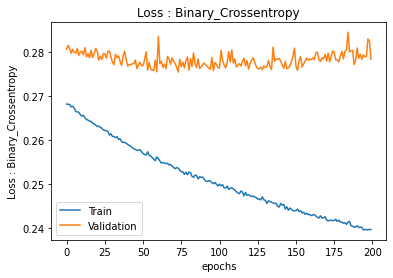

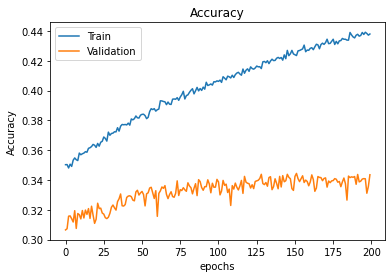

In [92]:
print(t1_softmax-t0_softmax)
test_loss,test_accuracy = model1_softmax.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1_softmax.history['loss'])
plt.plot(train_model1_softmax.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_softmax.history['accuracy'])
plt.plot(train_model1_softmax.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

#soal_ve

##BinaryCrossentropy

In [ ]:
model1_sigmoid = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='sigmoid')                    
])
model1_sigmoid.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_sigmoid.summary()

In [ ]:
t0_sigmoid = dt.datetime.now()
train_model1_sigmoid = model1_sigmoid.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_sigmoid = dt.datetime.now()
print(t1_sigmoid-t0_sigmoid)

0:02:22.538078
313/313 [==============================] - 0s 1ms/step - loss: 0.2611 - accuracy: 0.3845
0.2611045837402344
0.38449999690055847


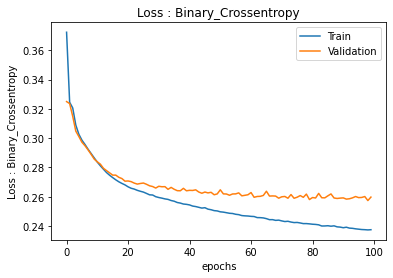

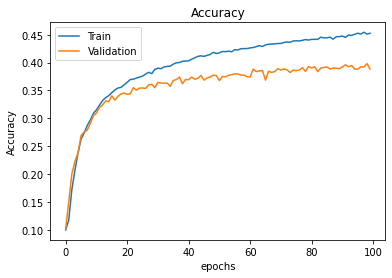

In [ ]:
print(t1_sigmoid-t0_sigmoid)
test_loss,test_accuracy = model1_sigmoid.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1_sigmoid.history['loss'])
plt.plot(train_model1_sigmoid.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_sigmoid.history['accuracy'])
plt.plot(train_model1_sigmoid.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##CategoricalCrossentropy

In [ ]:
model1_sigmoid_loss2 = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='sigmoid')                    
])
model1_sigmoid_loss2.compile(
    optimizer='adam',
    loss='CategoricalCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_sigmoid_loss2.summary()

In [ ]:
t0_sigmoid_loss2 = dt.datetime.now()
train_model1_sigmoid_loss2 = model1_sigmoid_loss2.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_sigmoid_loss2 = dt.datetime.now()
print(t1_sigmoid_loss2-t0_sigmoid_loss2)

0:02:22.538078
313/313 [==============================] - 0s 1ms/step - loss: 0.2611 - accuracy: 0.3845
0.2611045837402344
0.38449999690055847


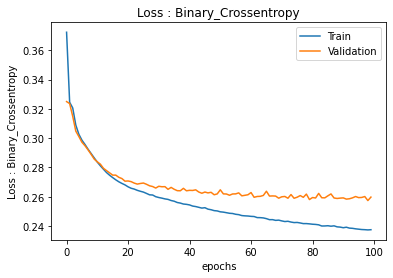

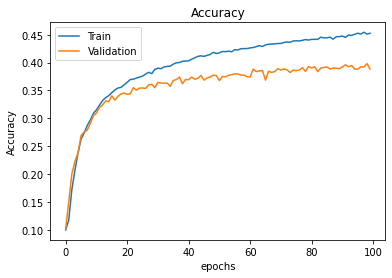

In [ ]:
print(t1_sigmoid_loss2-t0_sigmoid_loss2)
test_loss,test_accuracy = model1_sigmoid_loss2.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1_sigmoid_loss2.history['loss'])
plt.plot(train_model1_sigmoid_loss2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_sigmoid_loss2.history['accuracy'])
plt.plot(train_model1_sigmoid_loss2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##Poisson

In [ ]:
model1_sigmoid_loss3 = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='sigmoid')                    
])
model1_sigmoid_loss3.compile(
    optimizer='adam',
    loss='Poisson',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_sigmoid_loss3.summary()

In [ ]:
t0_sigmoid_loss3 = dt.datetime.now()
train_model1_sigmoid_loss3 = model1_sigmoid_loss3.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_sigmoid_loss3 = dt.datetime.now()
print(t1_sigmoid_loss3-t0_sigmoid_loss3)

0:02:05.697830
313/313 [==============================] - 0s 1ms/step - loss: 0.2740 - accuracy: 0.3871
0.2740287184715271
0.3871000111103058


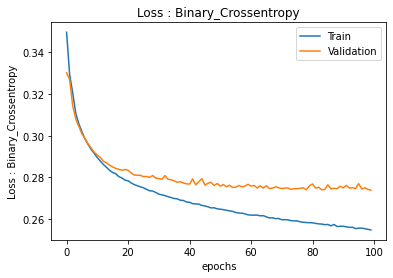

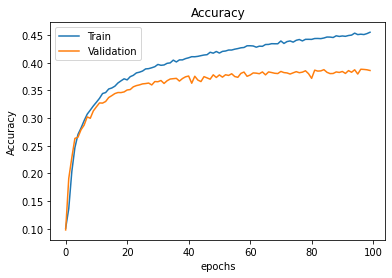

In [103]:
print(t1_sigmoid_loss3-t0_sigmoid_loss3)
test_loss,test_accuracy = model1_sigmoid_loss3.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1_sigmoid_loss3.history['loss'])
plt.plot(train_model1_sigmoid_loss3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_sigmoid_loss3.history['accuracy'])
plt.plot(train_model1_sigmoid_loss3.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

#soal_je

##adam

In [ ]:
model1_sigmoid = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='sigmoid')                    
])
model1_sigmoid.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_sigmoid.summary()

In [ ]:
t0_sigmoid = dt.datetime.now()
train_model1_sigmoid = model1_sigmoid.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_sigmoid = dt.datetime.now()
print(t1_sigmoid-t0_sigmoid)

0:02:22.538078
313/313 [==============================] - 0s 1ms/step - loss: 0.2611 - accuracy: 0.3845
0.2611045837402344
0.38449999690055847


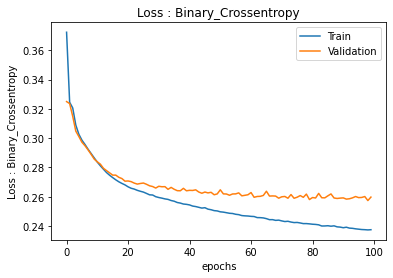

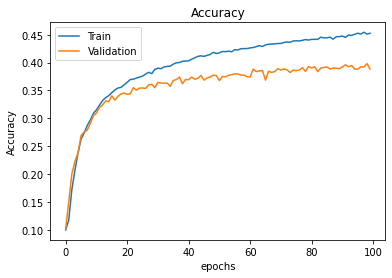

In [ ]:
print(t1_sigmoid-t0_sigmoid)
test_loss,test_accuracy = model1_sigmoid.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1_sigmoid.history['loss'])
plt.plot(train_model1_sigmoid.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_sigmoid.history['accuracy'])
plt.plot(train_model1_sigmoid.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##ftrl

In [106]:
model1_sigmoid_op2 = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='sigmoid')                    
])
model1_sigmoid_op2.compile(
    optimizer='ftrl',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_sigmoid_op2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 32)                32800     
                                                                 
 dense_61 (Dense)            (None, 32)                1056      
                                                                 
 dense_62 (Dense)            (None, 10)                330       
                                                                 
Total params: 34,186
Trainable params: 34,186
Non-trainable params: 0
_________________________________________________________________


In [108]:
t0_sigmoid_op2 = dt.datetime.now()
train_model1_sigmoid_op2 = model1_sigmoid_op2.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_sigmoid_op2 = dt.datetime.now()
print(t1_sigmoid_op2-t0_sigmoid_op2)

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 0.6403 - accuracy: 0.0999 - val_loss: 0.5981 - val_accuracy: 0.0997
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5689 - accuracy: 0.0994 - val_loss: 0.5431 - val_accuracy: 0.0997
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5228 - accuracy: 0.0983 - val_loss: 0.5044 - val_accuracy: 0.0997
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 0.4891 - accuracy: 0.0982 - val_loss: 0.4749 - val_accuracy: 0.0997
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 0.4629 - accuracy: 0.1001 - val_loss: 0.4516 - val_accuracy: 0.0997
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.4419 - accuracy: 0.0999 - val_loss: 0.4326 - val_accuracy: 0.0997
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.4245 - accuracy: 0.0997 - val_loss: 0.4168 - val_accuracy: 0.0997

0:02:22.601732
313/313 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.1000
0.3251250088214874
0.10000000149011612


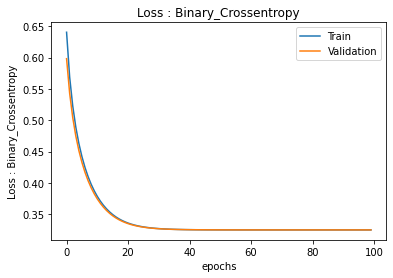

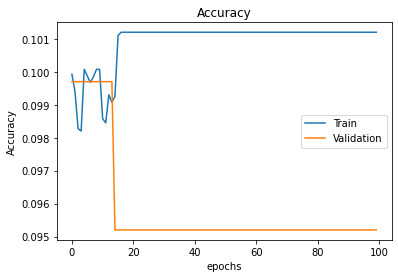

In [109]:
print(t1_sigmoid_op2-t0_sigmoid_op2)
test_loss,test_accuracy = model1_sigmoid_op2.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1_sigmoid_op2.history['loss'])
plt.plot(train_model1_sigmoid_op2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_sigmoid_op2.history['accuracy'])
plt.plot(train_model1_sigmoid_op2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##adadelta

In [110]:
model1_sigmoid_op3 = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    #layers.Dense(10,activation='relu'),
    #layers.Dense(3,activation='relu'),
    layers.Dense(10,activation='sigmoid')                    
])
model1_sigmoid_op3.compile(
    optimizer='adadelta',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_sigmoid_op3.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 32)                32800     
                                                                 
 dense_64 (Dense)            (None, 32)                1056      
                                                                 
 dense_65 (Dense)            (None, 10)                330       
                                                                 
Total params: 34,186
Trainable params: 34,186
Non-trainable params: 0
_________________________________________________________________


In [112]:
t0_sigmoid_op3 = dt.datetime.now()
train_model1_sigmoid_op3 = model1_sigmoid_op3.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_sigmoid_op3 = dt.datetime.now()
print(t1_sigmoid_op3-t0_sigmoid_op3)

Epoch 1/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3286 - accuracy: 0.0859 - val_loss: 0.3284 - val_accuracy: 0.0891
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3284 - accuracy: 0.0858 - val_loss: 0.3282 - val_accuracy: 0.0887
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3283 - accuracy: 0.0856 - val_loss: 0.3281 - val_accuracy: 0.0885
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3281 - accuracy: 0.0848 - val_loss: 0.3279 - val_accuracy: 0.0879
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3280 - accuracy: 0.0837 - val_loss: 0.3278 - val_accuracy: 0.0867
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3278 - accuracy: 0.0832 - val_loss: 0.3277 - val_accuracy: 0.0859
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3277 - accuracy: 0.0821 - val_loss: 0.3276 - val_accuracy: 0.0856

0:02:22.074393
313/313 [==============================] - 1s 2ms/step - loss: 0.3250 - accuracy: 0.1035
0.3249925971031189
0.10350000113248825


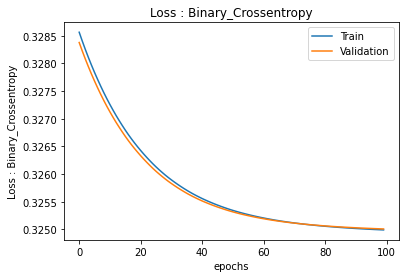

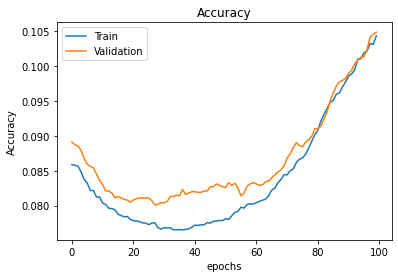

In [113]:
print(t1_sigmoid_op3-t0_sigmoid_op3)
test_loss,test_accuracy = model1_sigmoid_op3.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1_sigmoid_op3.history['loss'])
plt.plot(train_model1_sigmoid_op3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_sigmoid_op3.history['accuracy'])
plt.plot(train_model1_sigmoid_op3.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

#soal_he

##1

In [117]:
model1_sigmoid_1 = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32*10,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(10,activation='sigmoid')                    
])
model1_sigmoid_1.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_sigmoid_1.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 320)               328000    
                                                                 
 dense_82 (Dense)            (None, 32)                10272     
                                                                 
 dense_83 (Dense)            (None, 32)                1056      
                                                                 
 dense_84 (Dense)            (None, 32)                1056      
                                                                 
 dense_85 (Dense)            (None, 10)                330       
                                                                 
Total params: 340,714
Trainable params: 340,714
Non-trainable params: 0
_________________________________________________________________


In [118]:
t0_sigmoid_1 = dt.datetime.now()
train_model1_sigmoid_1 = model1_sigmoid_1.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_sigmoid_1 = dt.datetime.now()
print(t1_sigmoid_1-t0_sigmoid_1)

Epoch 1/100
313/313 [==============================] - 4s 10ms/step - loss: 0.3599 - accuracy: 0.1003 - val_loss: 0.3252 - val_accuracy: 0.1025
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.3252 - accuracy: 0.1030 - val_loss: 0.3253 - val_accuracy: 0.0952
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.3252 - accuracy: 0.0989 - val_loss: 0.3254 - val_accuracy: 0.0952
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.3252 - accuracy: 0.0971 - val_loss: 0.3251 - val_accuracy: 0.0952
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.3249 - accuracy: 0.1063 - val_loss: 0.3230 - val_accuracy: 0.1363
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.3147 - accuracy: 0.1595 - val_loss: 0.3089 - val_accuracy: 0.1704
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.3061 - accuracy: 0.1811 - val_loss: 0.3037 - val_accuracy: 0.18

0:06:22.602878
313/313 [==============================] - 1s 3ms/step - loss: 0.3002 - accuracy: 0.4193
0.30024227499961853
0.41929998993873596


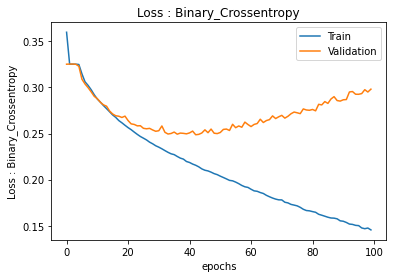

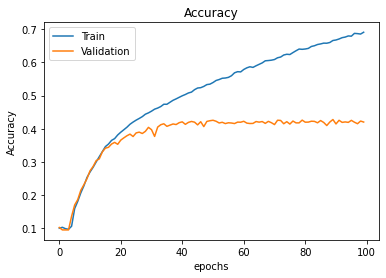

In [119]:
print(t1_sigmoid_1-t0_sigmoid_1)
test_loss,test_accuracy = model1_sigmoid_1.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1_sigmoid_1.history['loss'])
plt.plot(train_model1_sigmoid_1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_sigmoid_1.history['accuracy'])
plt.plot(train_model1_sigmoid_1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##2

In [120]:
model1_sigmoid_2 = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(10,activation='sigmoid')                    
])
model1_sigmoid_2.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_sigmoid_2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 32)                32800     
                                                                 
 dense_87 (Dense)            (None, 32)                1056      
                                                                 
 dense_88 (Dense)            (None, 32)                1056      
                                                                 
 dense_89 (Dense)            (None, 32)                1056      
                                                                 
 dense_90 (Dense)            (None, 10)                330       
                                                                 
Total params: 36,298
Trainable params: 36,298
Non-trainable params: 0
_________________________________________________________________


In [121]:
t0_sigmoid_2 = dt.datetime.now()
train_model1_sigmoid_2 = model1_sigmoid_2.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_sigmoid_2 = dt.datetime.now()
print(t1_sigmoid_2-t0_sigmoid_2)

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 0.3416 - accuracy: 0.0992 - val_loss: 0.3253 - val_accuracy: 0.0977
Epoch 2/100
313/313 [==============================] - 1s 5ms/step - loss: 0.3247 - accuracy: 0.1096 - val_loss: 0.3229 - val_accuracy: 0.1528
Epoch 3/100
313/313 [==============================] - 1s 5ms/step - loss: 0.3162 - accuracy: 0.1551 - val_loss: 0.3110 - val_accuracy: 0.1680
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 0.3091 - accuracy: 0.1711 - val_loss: 0.3069 - val_accuracy: 0.1726
Epoch 5/100
313/313 [==============================] - 2s 6ms/step - loss: 0.3059 - accuracy: 0.1770 - val_loss: 0.3050 - val_accuracy: 0.1977
Epoch 6/100
313/313 [==============================] - 2s 5ms/step - loss: 0.3037 - accuracy: 0.1884 - val_loss: 0.3034 - val_accuracy: 0.1929
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.3019 - accuracy: 0.1983 - val_loss: 0.3023 - val_accuracy: 0.211

0:03:22.623329
313/313 [==============================] - 1s 2ms/step - loss: 0.2623 - accuracy: 0.3770
0.2622953951358795
0.37700000405311584


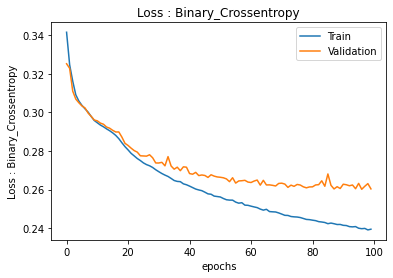

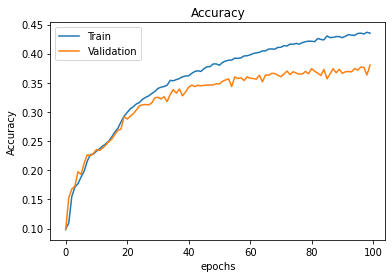

In [122]:
print(t1_sigmoid_2-t0_sigmoid_2)
test_loss,test_accuracy = model1_sigmoid_2.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1_sigmoid_2.history['loss'])
plt.plot(train_model1_sigmoid_2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_sigmoid_2.history['accuracy'])
plt.plot(train_model1_sigmoid_2.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

##3

In [123]:
model1_sigmoid_3 = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(10,activation='sigmoid'),
    layers.Dense(10,activation='sigmoid'),
    layers.Dense(10,activation='sigmoid')                    
])
model1_sigmoid_3.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1_sigmoid_3.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 32)                32800     
                                                                 
 dense_92 (Dense)            (None, 32)                1056      
                                                                 
 dense_93 (Dense)            (None, 10)                330       
                                                                 
 dense_94 (Dense)            (None, 10)                110       
                                                                 
 dense_95 (Dense)            (None, 10)                110       
                                                                 
Total params: 34,406
Trainable params: 34,406
Non-trainable params: 0
_________________________________________________________________


In [124]:
t0_sigmoid_3 = dt.datetime.now()
train_model1_sigmoid_3 = model1_sigmoid_3.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_sigmoid_3 = dt.datetime.now()
print(t1_sigmoid_3-t0_sigmoid_3)

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 0.4911 - accuracy: 0.1001 - val_loss: 0.3515 - val_accuracy: 0.0997
Epoch 2/100
313/313 [==============================] - 1s 5ms/step - loss: 0.3329 - accuracy: 0.1001 - val_loss: 0.3260 - val_accuracy: 0.0997
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3254 - accuracy: 0.1001 - val_loss: 0.3251 - val_accuracy: 0.0997
Epoch 4/100
313/313 [==============================] - 1s 5ms/step - loss: 0.3251 - accuracy: 0.1028 - val_loss: 0.3251 - val_accuracy: 0.1065
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3250 - accuracy: 0.1150 - val_loss: 0.3249 - val_accuracy: 0.1173
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3245 - accuracy: 0.1249 - val_loss: 0.3240 - val_accuracy: 0.1483
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3233 - accuracy: 0.1430 - val_loss: 0.3224 - val_accuracy: 0.1499

0:03:22.595577
313/313 [==============================] - 1s 2ms/step - loss: 0.2717 - accuracy: 0.3308
0.27165040373802185
0.33079999685287476


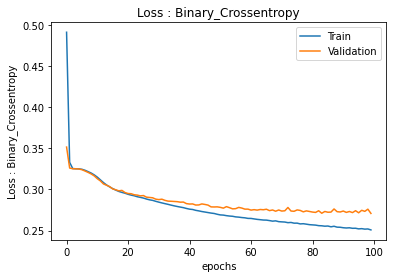

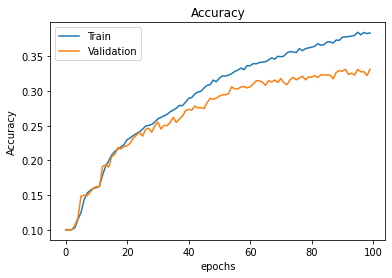

In [125]:
print(t1_sigmoid_3-t0_sigmoid_3)
test_loss,test_accuracy = model1_sigmoid_3.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)
plt.plot(train_model1_sigmoid_3.history['loss'])
plt.plot(train_model1_sigmoid_3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1_sigmoid_3.history['accuracy'])
plt.plot(train_model1_sigmoid_3.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()